# Visualization

Trong bài tập này, bạn sẽ được rèn luyện kĩ năng trực quan hóa. Trực quan hóa ngoài việc hỗ  trợ trong khâu tiền xử lí dữ liệu, còn giúp bạn phân tích và rút ra được các thông tin có ý nghĩa từ dữ liệu

**Tập dữ liệu** được sử dụng được lấy từ trang batdongsan.com.vn

In [51]:
#Import các thư viện cần thiết

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import random
import math

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
cd /content/drive/MyDrive/Preprocessing_practice/2.Assignment/Batdongsan.com.vn

/content/drive/MyDrive/Preprocessing_practice/2.Assignment/Batdongsan.com.vn


In [54]:
#Load dữ liệu từ file
newdf = pd.read_csv("batdongsan.com.vn.csv", dtype = {"month": "string" , "id" : "string"})
print("DONE")

DONE


In [55]:
newdf.columns

Index(['id', 'month', 'project', 'investor', 'square', 'bedrooms', 'bathrooms',
       'direction', 'balcony', 'district', 'ward', 'price'],
      dtype='object')

In [56]:
# Xem 5 hàng dữ liệu đầu tiên, các thông tin ban đầu: df.info(), df.describe(), ...
# Code ở đây:

In [57]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81163 entries, 0 to 81162
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         81163 non-null  string 
 1   month      81162 non-null  string 
 2   project    78097 non-null  object 
 3   investor   65453 non-null  object 
 4   square     81162 non-null  float64
 5   bedrooms   81162 non-null  float64
 6   bathrooms  81162 non-null  float64
 7   direction  51086 non-null  object 
 8   balcony    54426 non-null  object 
 9   district   81162 non-null  object 
 10  ward       79506 non-null  object 
 11  price      81162 non-null  float64
dtypes: float64(4), object(6), string(2)
memory usage: 7.4+ MB


In [58]:
newdf.describe()

,square,bedrooms,bathrooms,price
count,81162.000000,81162.000000,81162.000000,81162.000000
mean,83.481974,2.365602,1.897785,2404.748090
std,25.662160,0.622283,0.404293,1038.825418
min,7.000000,1.000000,1.000000,350.000000
25%,66.000000,2.000000,2.000000,1520.000000
50%,79.000000,2.000000,2.000000,2300.000000
75%,98.000000,3.000000,2.000000,3150.000000
max,296.000000,4.000000,4.000000,5000.000000


Đưa ra các câu lệnh để thực hiện các yêu cầu sau:

1. Minh họa boxblot của các trường số như price, bedrooms, square, ...

* Gợi ý: sns.boxplot(data_field)

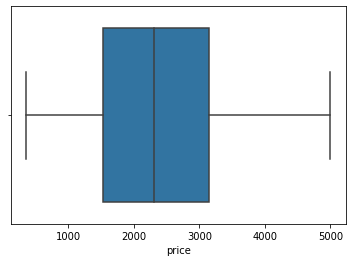

In [59]:
#Code for 'price' field
sns.boxplot(x = newdf['price'])

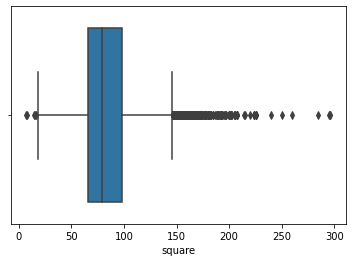

In [60]:
#Code for 'square' field
sns.boxplot(x = newdf['square'])

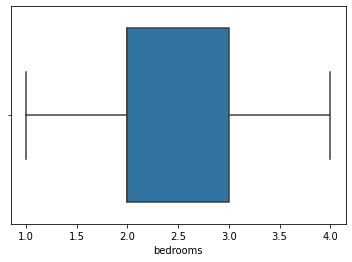

In [61]:
#Code for 'bedrooms' field
sns.boxplot(x = newdf['bedrooms'])

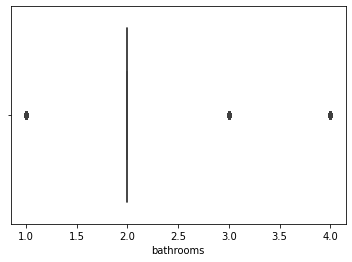

In [62]:
#Code for 'bathrooms' field
sns.boxplot(x = newdf['bathrooms'])

2. Cho đoạn code minh họa Biểu đồ thể hiện số bài đăng theo tháng của năm 2020. Hãy thực hiện các yêu cầu cho các câu hỏi dưới đây:

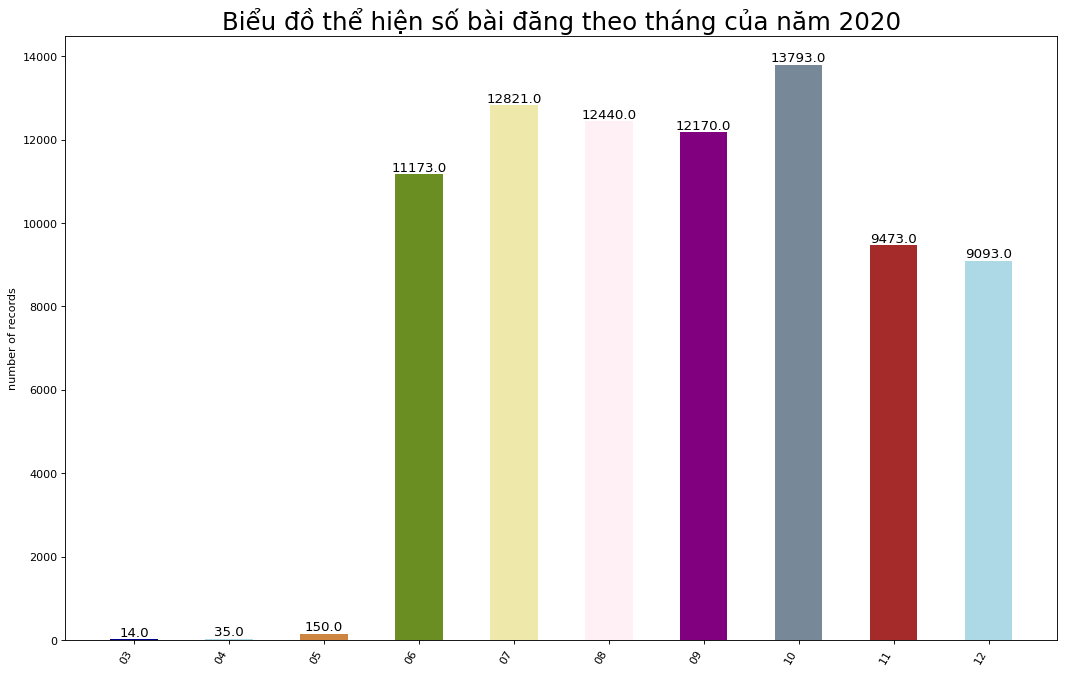

In [63]:
df1 = newdf.groupby('month').size().reset_index(name='number of records')
n = df1['month'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df1['month'], df1['number of records'], color=c, width=.5)
for i, val in enumerate(df1['number of records'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện số bài đăng theo tháng của năm 2020", fontsize=22)
plt.ylabel('number of records')
plt.show()

* Biểu đồ thể hiện giá nhà đất trung bình theo tháng (VND/m2)

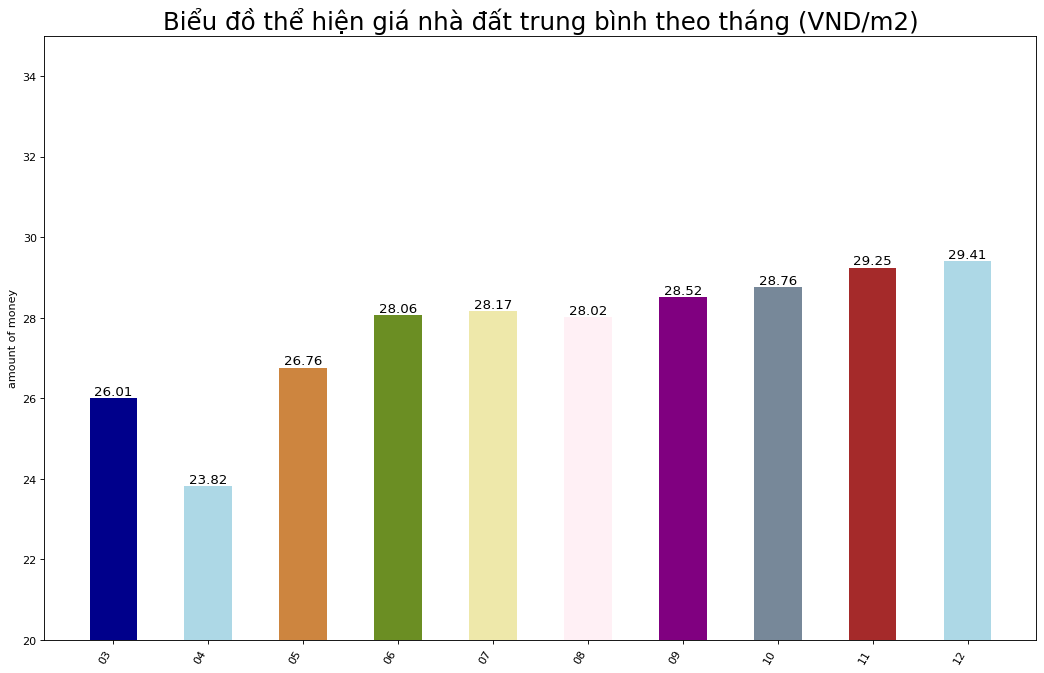

In [64]:
def newprice(row):
  return row['price']/row['square'] #VND/m2

dftmp = newdf.copy()
dftmp['pricePerSquare'] = dftmp.apply(newprice, axis = 1)
df2 = dftmp.groupby('month')['pricePerSquare'].mean().reset_index(name='amount of money')
# df2['amount of money'] = df2['amount of money'].apply(lambda x : int(str(x).split('.')[0]))
df2['amount of money'] = df2['amount of money'].apply(lambda x : round(x, 2))
n = df2['month'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df2['month'], df2['amount of money'], color=c, width=.5)
for i, val in enumerate(df2['amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df2['month'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện giá nhà đất trung bình theo tháng (VND/m2)", fontsize=22)
plt.ylabel('amount of money')
plt.ylim(20,35)
plt.show()

* Biểu đồ mật độ giá nhà của tháng 4 và tháng 12 (VND/m2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


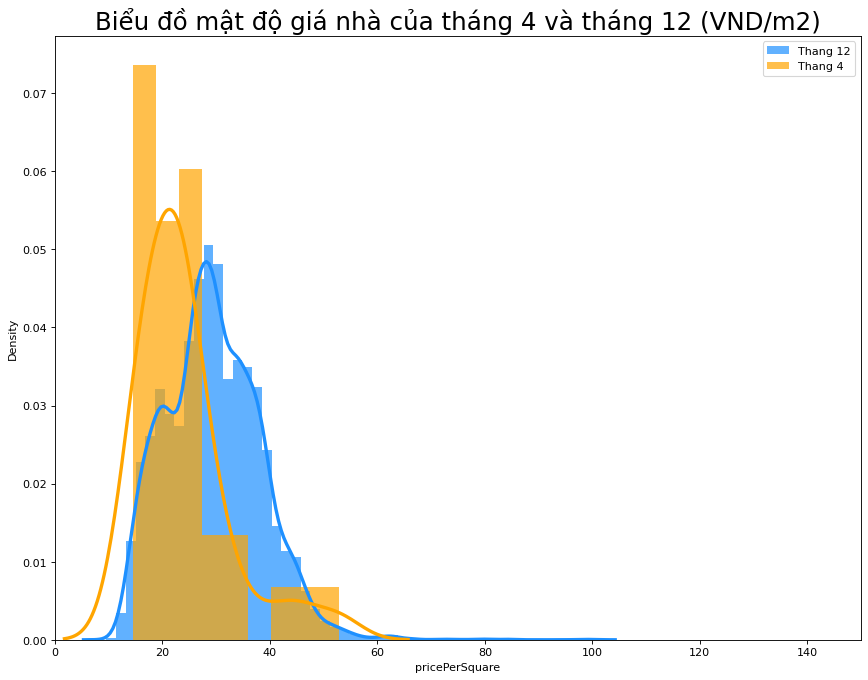

In [65]:
plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(dftmp.loc[dftmp['month'] == '12', "pricePerSquare"], color="dodgerblue", label="Thang 12", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(dftmp.loc[dftmp['month'] == '04', "pricePerSquare"], color="orange", label="Thang 4", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.xlim(0, 150)
plt.title('Biểu đồ mật độ giá nhà của tháng 4 và tháng 12 (VND/m2)', fontsize=22)
plt.legend()
plt.show()

* Số lượng bất động sản phân theo số lượng bedrooms

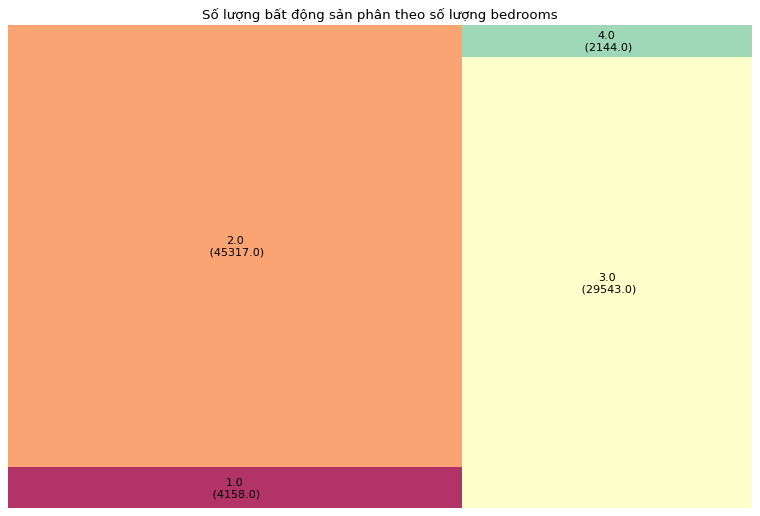

In [66]:
!pip install squarify
import squarify 
df = newdf.groupby('bedrooms').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('Số lượng bất động sản phân theo số lượng bedrooms')
plt.axis('off')
plt.show()

* Giá bất động sản trung bình theo số lượng bedrooms

['darkblue', 'lightblue', 'peru', 'olivedrab', 'palegoldenrod']


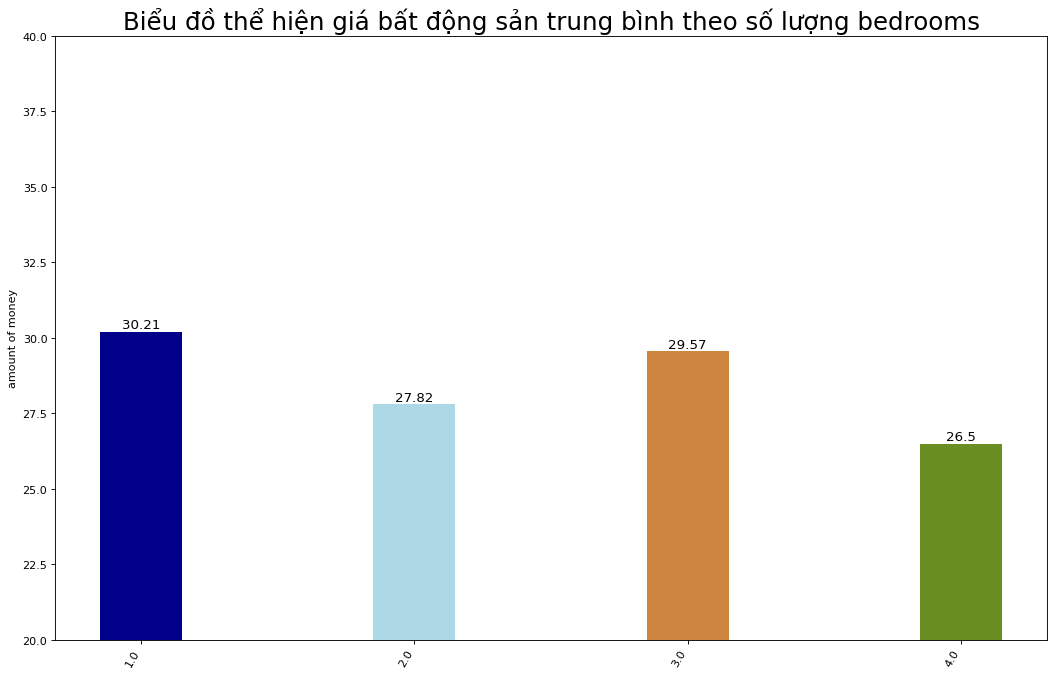

In [67]:
df3 = dftmp.groupby('bedrooms')['pricePerSquare'].mean().reset_index(name='amount of money')
# df3['amount of money'] = df3['amount of money'].apply(lambda x : int(str(x).split('.')[0]))
df3['amount of money'] = df3['amount of money'].apply(lambda x : round(x, 2))
df3['bedrooms'] = df3['bedrooms'].apply(lambda x : str(x))
n = df3['bedrooms'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)
print(c)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df3['bedrooms'], df3['amount of money'], color=c, width=.3)
for i, val in enumerate(df3['amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df3['bedrooms'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện giá bất động sản trung bình theo số lượng bedrooms", fontsize=22)
plt.ylim(20,40)
plt.ylabel('amount of money')
plt.show()

* Giá nhà đất trung bình theo quận (VND/m2)

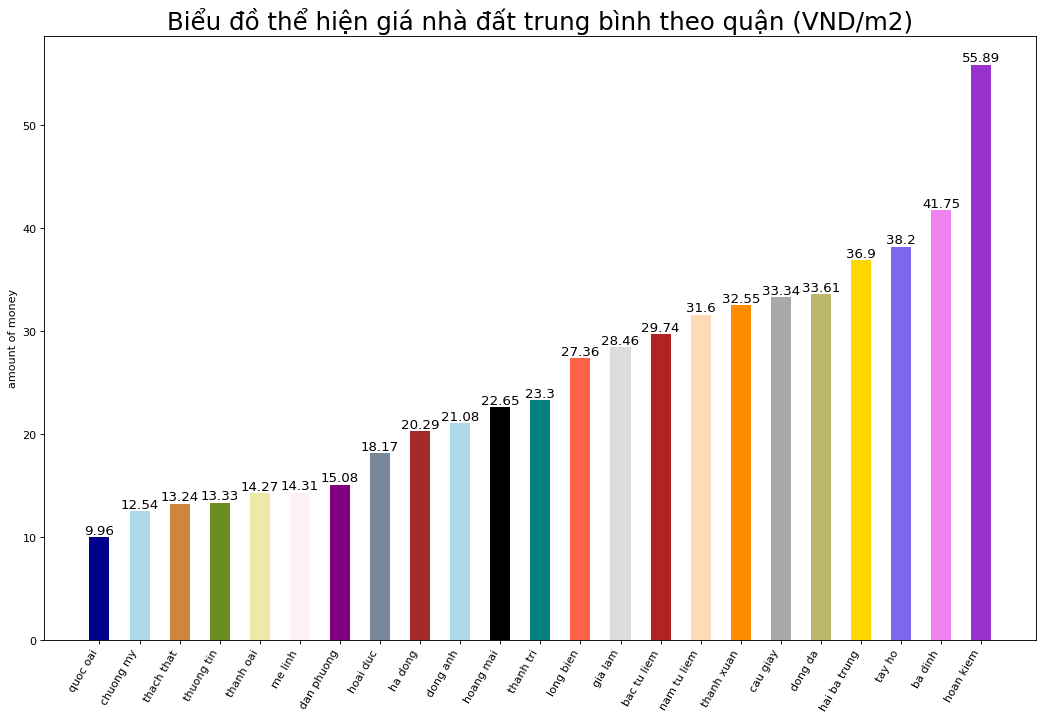

In [68]:
df2 = dftmp.groupby('district')['pricePerSquare'].mean().reset_index(name='amount of money')
df2 = df2.sort_values(by = 'amount of money') 
# df2['amount of money'] = df2['amount of money'].apply(lambda x : int(str(x).split('.')[0]))
df2['amount of money'] = df2['amount of money'].apply(lambda x : round(x, 2))
n = df2['district'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df2['district'], df2['amount of money'], color=c, width=.5)
for i, val in enumerate(df2['amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df2['district'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện giá nhà đất trung bình theo quận (VND/m2)", fontsize=22)
plt.ylabel('amount of money')
# plt.ylim(25,35)
plt.show()

* Giá nhà đất trung bình theo các phường quận Hoàn Kiếm (VND/m2)

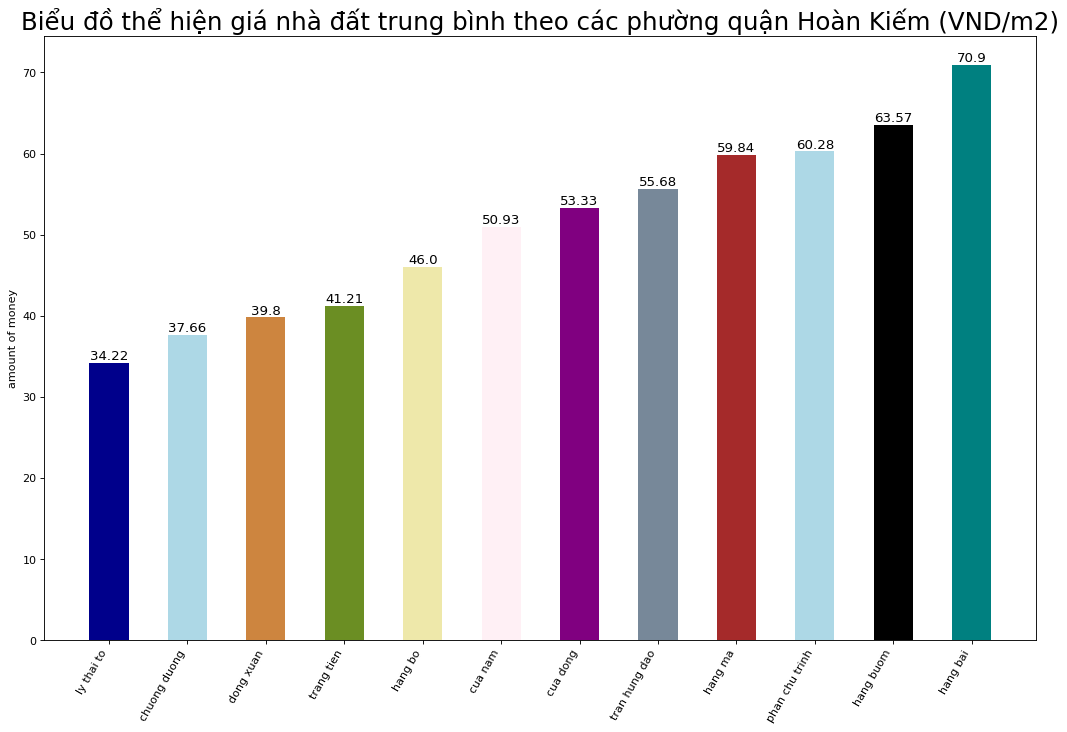

In [69]:
hoan_kiem = dftmp.loc[(dftmp['district'] == 'hoan kiem')]
df2 = hoan_kiem.groupby('ward')['pricePerSquare'].mean().reset_index(name='amount of money')
df2 = df2.sort_values(by = 'amount of money') 
# df2['amount of money'] = df2['amount of money'].apply(lambda x : int(str(x).split('.')[0]))
df2['amount of money'] = df2['amount of money'].apply(lambda x : round(x, 2))
n = df2['ward'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df2['ward'], df2['amount of money'], color=c, width=.5)
for i, val in enumerate(df2['amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df2['ward'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện giá nhà đất trung bình theo các phường quận Hoàn Kiếm (VND/m2)", fontsize=22)
plt.ylabel('amount of money')
# plt.ylim(25,35)
plt.show()

* Giá nhà đất trung bình theo nhà đầu tư (VND/m2)

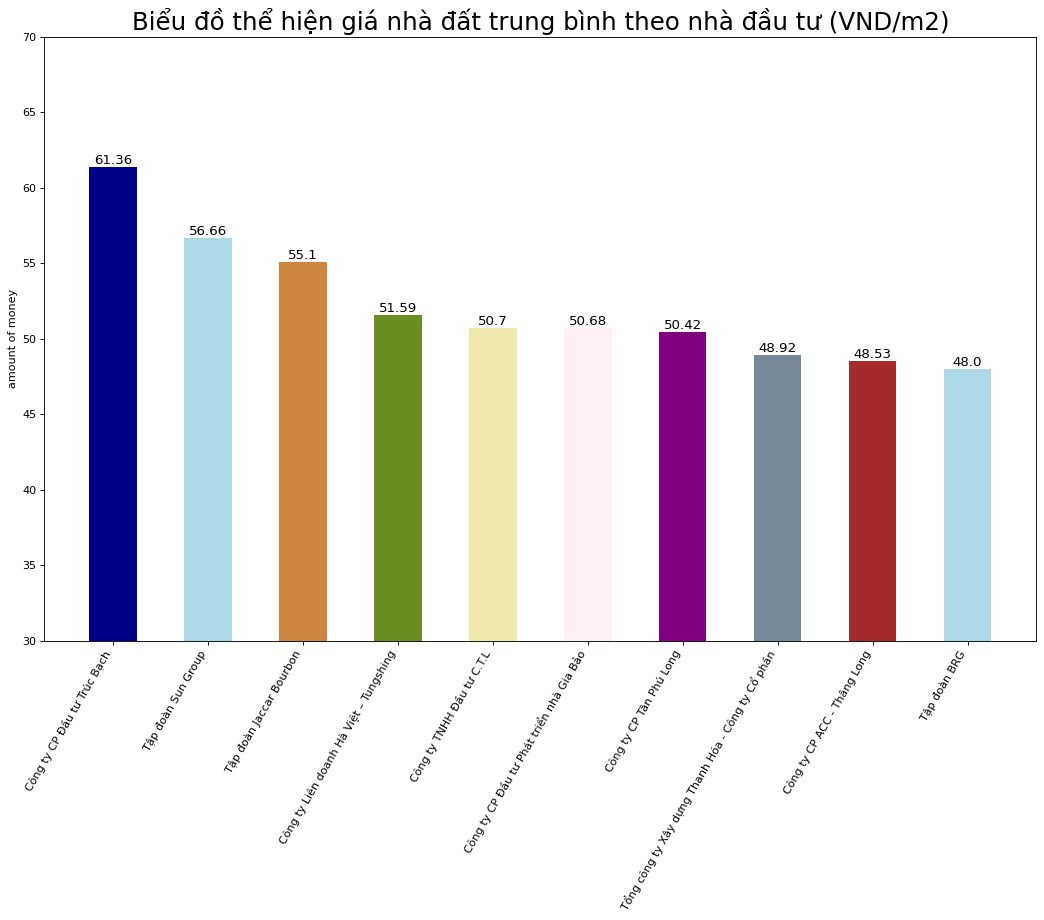

In [70]:
df2 = dftmp.groupby('investor')['pricePerSquare'].mean().reset_index(name='amount of money')
df2 = df2.sort_values(by = 'amount of money', ascending= False).head(10)
# df2['amount of money'] = df2['amount of money'].apply(lambda x : int(str(x).split('.')[0]))
df2['amount of money'] = df2['amount of money'].apply(lambda x : round(x, 2))
n = df2['investor'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df2['investor'], df2['amount of money'], color=c, width=.5)
for i, val in enumerate(df2['amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df2['investor'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện giá nhà đất trung bình theo nhà đầu tư (VND/m2)", fontsize=22)
plt.ylabel('amount of money')
plt.ylim(30,70)
plt.show()

* Giá nhà đất trung bình theo dự án (VND/m2)

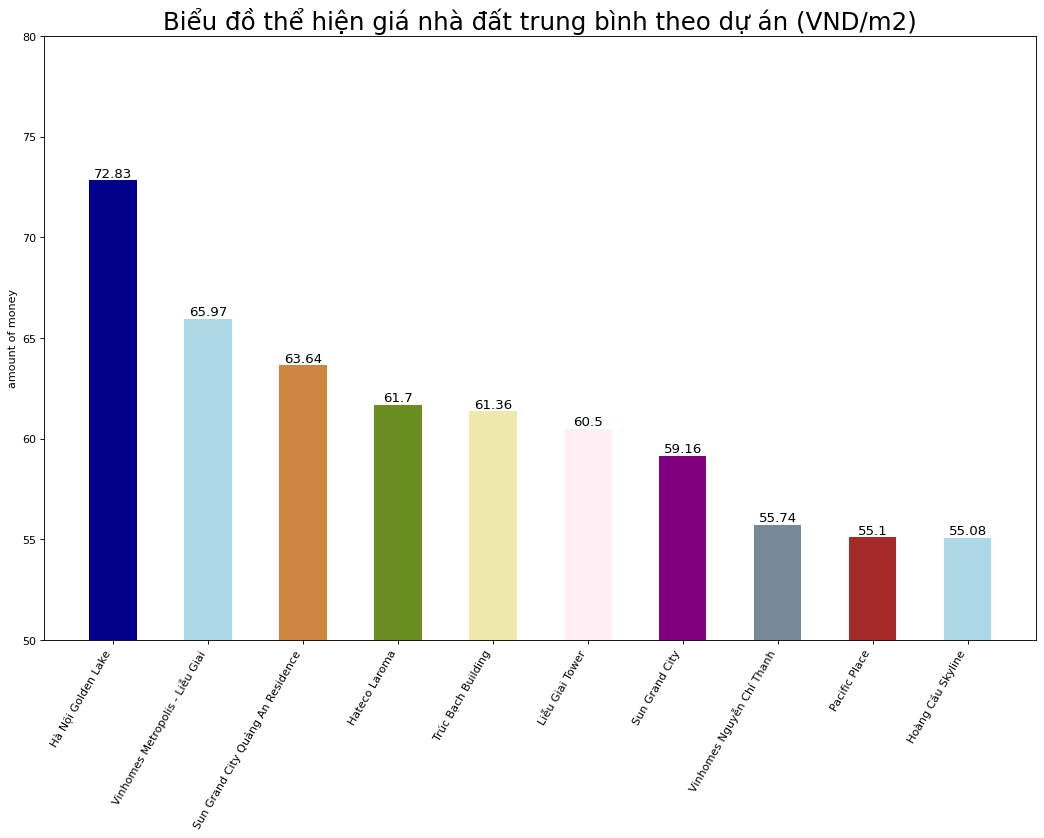

In [71]:
df2 = dftmp.groupby('project')['pricePerSquare'].mean().reset_index(name='amount of money')
df2 = df2.sort_values(by = 'amount of money', ascending= False).head(10)
# df2['amount of money'] = df2['amount of money'].apply(lambda x : int(str(x).split('.')[0]))
df2['amount of money'] = df2['amount of money'].apply(lambda x : round(x, 2))
n = df2['project'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df2['project'], df2['amount of money'], color=c, width=.5)
for i, val in enumerate(df2['amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df2['project'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện giá nhà đất trung bình theo dự án (VND/m2)", fontsize=22)
plt.ylabel('amount of money')
plt.ylim(50,80)
plt.show()

* Giá bất động sản phân bố theo top 10 nhà đầu tư triệu /m2

['Công ty CP Đầu tư Trúc Bạch' 'Tập đoàn Sun Group'
 'Tập đoàn Jaccar Bourbon' 'Công ty Liên doanh Hà Việt – Tungshing'
 'Công ty TNHH Đầu tư C.T.L' 'Công ty CP Đầu tư Phát triển nhà Gia Bảo'
 'Công ty CP Tân Phú Long'
 'Tổng công ty Xây dựng Thanh Hóa - Công ty Cổ phần'
 'Công ty CP ACC - Thăng Long' 'Tập đoàn BRG']


Text(0.5, 1.0, 'Giá bất động sản phân bố theo top 10 nhà đầu tư triệu /m2')

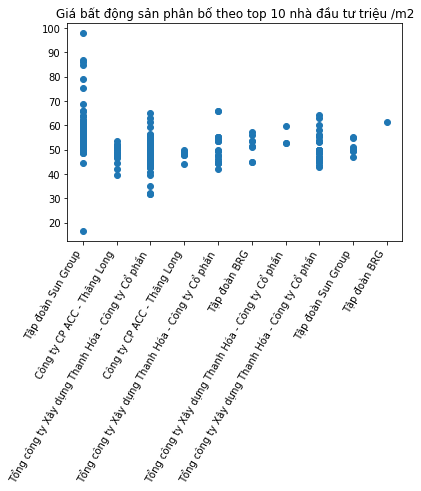

In [72]:
inves = dftmp[dftmp['investor'].notnull()]
inves = inves.groupby('investor')['pricePerSquare'].mean().reset_index(name='amount of money')
inves = inves.sort_values(by = 'amount of money', ascending= False).head(10)
topInves = inves['investor'].unique()
print(topInves)
df2 = dftmp.loc[dftmp['investor'].isin(topInves)]
 
plt.scatter(df2.investor, df2.pricePerSquare)
# plt.ylim(0,100)
plt.gca().set_xticklabels(df2['investor'], rotation=60, horizontalalignment= 'right')
plt.title("Giá bất động sản phân bố theo top 10 nhà đầu tư triệu /m2")

* Giá bất động sản phân bố theo dự án

['Hà Nội Golden Lake' 'Vinhomes Metropolis - Liễu Giai'
 'Sun Grand City Quảng An Residence' 'Hateco Laroma' 'Trúc Bạch Building'
 'Liễu Giai Tower' 'Sun Grand City' 'Vinhomes Nguyễn Chí Thanh'
 'Pacific Place' 'Hoàng Cầu Skyline']
             id month  ...   price pricePerSquare
217    27988796    12  ...  4500.0      97.826087
320    28111000    12  ...  4440.0      60.000000
382    24458492    12  ...  4700.0      54.651163
633    28125955    12  ...  4600.0      53.488372
679    25436762    12  ...  4700.0      54.651163
...         ...   ...  ...     ...            ...
74247  25937912    06  ...  4300.0      78.181818
74265  25567443    06  ...  4550.0      54.819277
75470  25907355    06  ...  4300.0      64.179104
80552  25747362    06  ...  4000.0      80.000000
80976  24208962    06  ...  3900.0      81.250000

[201 rows x 13 columns]


Text(0.5, 1.0, 'Giá bất động sản phân bố theo dự án triệu VND/m2 ')

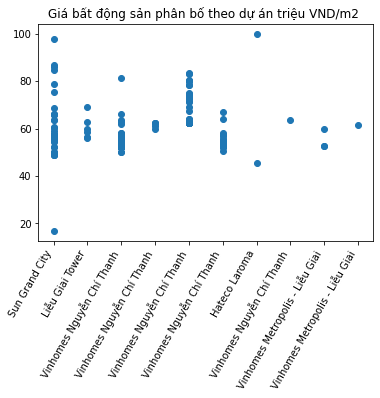

In [73]:
pr = dftmp[dftmp['project'].notnull()]
pr = pr.groupby('project')['pricePerSquare'].mean().reset_index(name='amount of money')
pr = pr.sort_values(by = 'amount of money', ascending= False).head(10)
protop = pr['project'].unique()
print(protop)
df7 = dftmp.loc[(dftmp['project'].isin(protop))]
print(df7)
plt.scatter(df7.project, df7.pricePerSquare)
# plt.ylim(0,150)
plt.gca().set_xticklabels(df7['project'], rotation=60, horizontalalignment= 'right')
plt.title("Giá bất động sản phân bố theo dự án triệu VND/m2 ")

* Giá nhà đất trung bình theo hướng nhà (VND/m2)

['Nam' 'Bắc' 'Tây' 'Đông' 'none' 'Tây-Bắc' 'Tây-Nam' 'Đông-Nam']
['Đông-Nam' 'none' 'Tây-Bắc' 'Tây-Nam' 'Bắc' 'Nam' 'Đông' 'Tây']


Text(0.5, 1.0, 'Giá bất động sản phân bố theo hướng nhà triệu VND/m2 ')

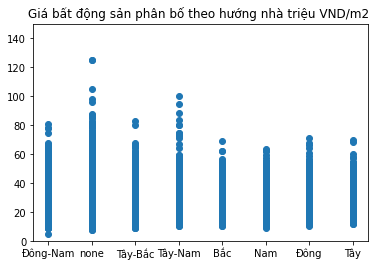

In [74]:
direct = dftmp.copy()
direct['direction'] = direct['direction'].apply(lambda x : 'none' if pd.isnull(x) == True else x )
# dir = dftmp[dftmp['direction'].notnull()]
dir = direct.groupby('direction')['pricePerSquare'].mean().reset_index(name='amount of money')
dir = dir.sort_values(by = 'amount of money', ascending= False).head(8)
topDir = dir['direction'].unique()
print(topDir)
df8 = direct.loc[direct['direction'].isin(topDir)]
print(df8['direction'].unique())
plt.scatter(df8.direction, df8.pricePerSquare)
plt.ylim(0,150)
# plt.gca().set_xticklabels(horizontalalignment= 'right')
plt.title("Giá bất động sản phân bố theo hướng nhà triệu VND/m2 ")

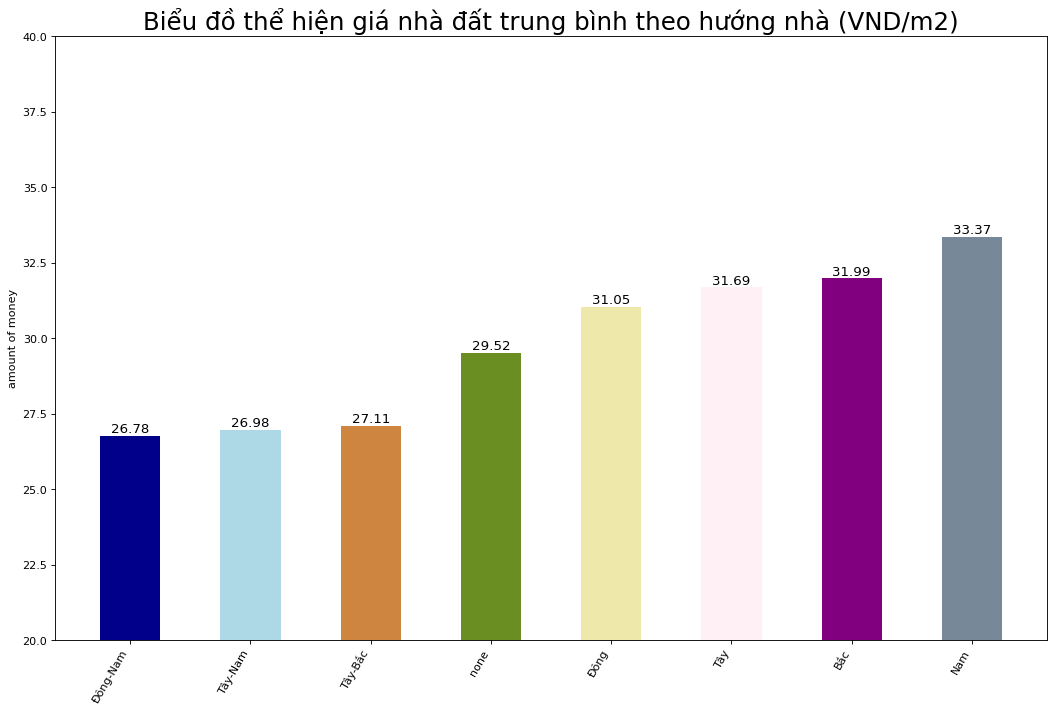

In [75]:
df2 = df8.groupby('direction')['pricePerSquare'].mean().reset_index(name='amount of money')
df2 = df2.sort_values(by = 'amount of money') 
# df2['amount of money'] = df2['amount of money'].apply(lambda x : int(str(x).split('.')[0]))
df2['amount of money'] = df2['amount of money'].apply(lambda x : round(x, 2))
n = df2['direction'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df2['direction'], df2['amount of money'], color=c, width=.5)
for i, val in enumerate(df2['amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df2['direction'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện giá nhà đất trung bình theo hướng nhà (VND/m2)", fontsize=22)
plt.ylabel('amount of money')
plt.ylim(20,40)
plt.show()

3. Tương quan giữa các trường thuộc tính

* https://vi.wikipedia.org/wiki/H%E1%BB%87_s%E1%BB%91_t%C6%B0%C6%A1ng_quan
* bieu do the hien he so tuong quan giua cac cap bien so thuc banggf biểu đồ heatmap

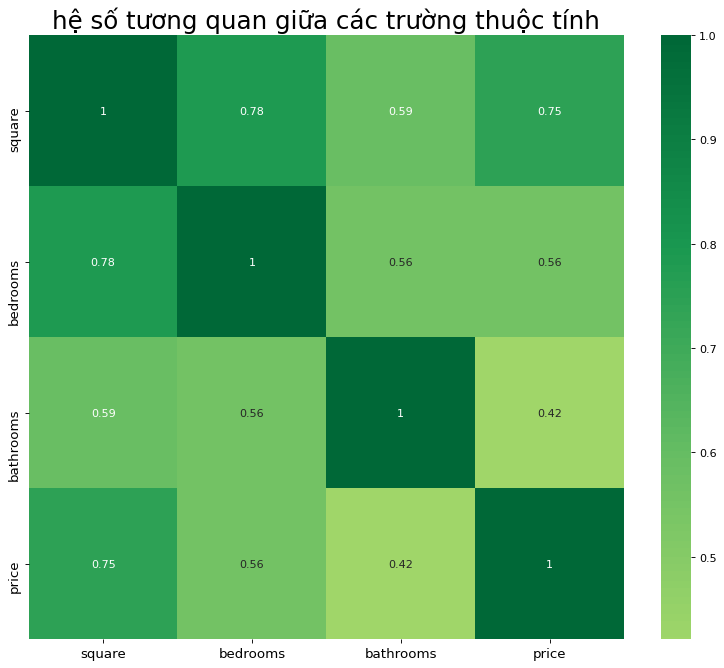

In [76]:
# Gợi ý: sns.heatmap(cmap='RdYlGn', ...)
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(newdf.corr(), xticklabels=newdf.corr().columns, yticklabels=newdf.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('hệ số tương quan giữa các trường thuộc tính', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

* bieu do the hien moi quan he giua cac bien so thuc với biểu đồ phân tán

<Figure size 800x640 with 0 Axes>

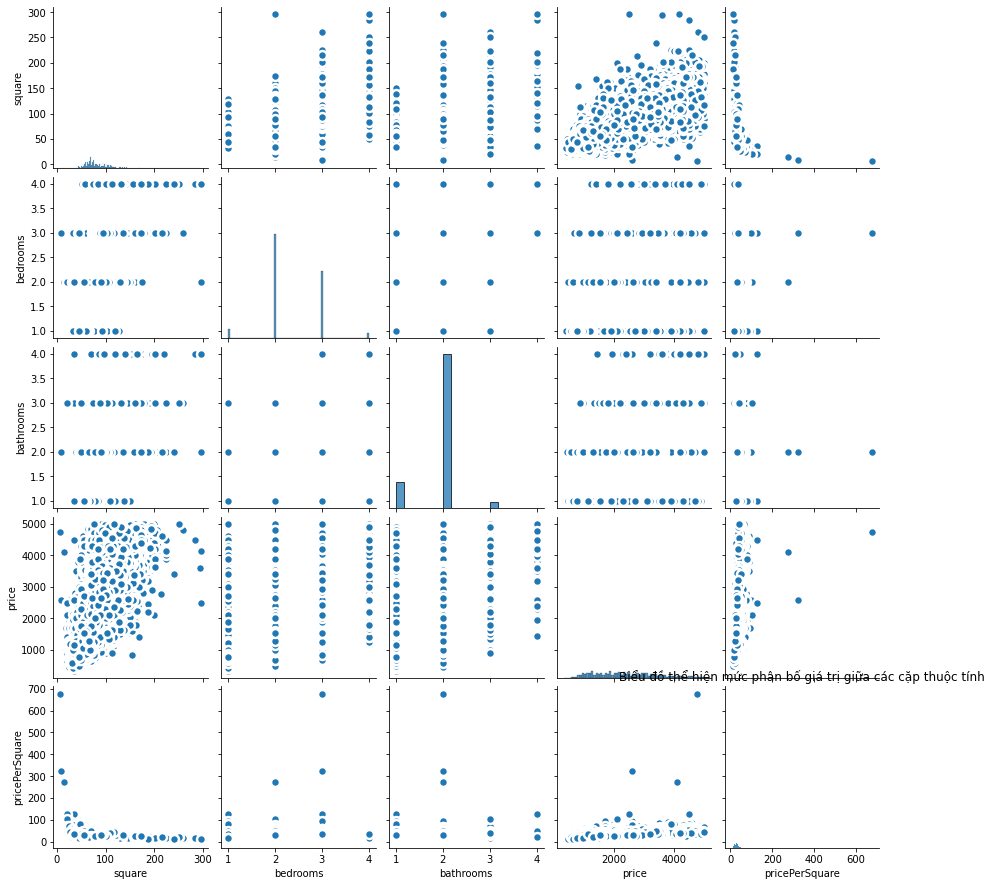

In [77]:
#Gợi ý: sns.pairplot(kind='scatter', ...)

plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(dftmp, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.title('Biểu đồ thể hiện mức phân bố giá trị giữa các cặp thuộc tính')
plt.show()

4. Mật độ giá nhà trung bình theo quận 

(0.0, 100.0)

<Figure size 432x288 with 0 Axes>

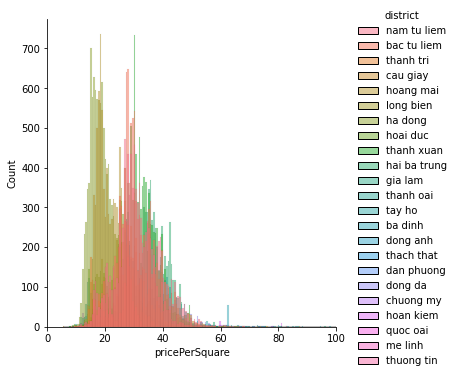

In [78]:
#Gợi ý: sns.displot()
df5 = dftmp.copy()
plt.clf()
sns.displot(df5, x="pricePerSquare", hue="district")
plt.xlim(0, 100)

End :))